## Credit Card Fraud Detection

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
from PIL import  Image
%matplotlib inline
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import plotly.express as px
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from IPython.display import display, HTML

<ipython-input-1-41c86a873dcc>:17: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [2]:
## helping functions

In [3]:
def getModelMetrics(actual=False,pred=False):

    confusion = metrics.confusion_matrix(actual, pred)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    print (confusion)
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual,pred)))
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    print('Specificity: {}'.format(TN / float(TN+FP)))
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    print('sklearn precision score value: {}'.format(metrics.precision_score(actual, pred )))
    print("Accuracy : {}".format(metrics.accuracy_score(actual,pred)))
    print("Recall : {}".format(metrics.recall_score(actual,pred)))
    print("Precision : {}".format(metrics.precision_score(actual,pred)))
    
    dic = {}
    dic['Roc_auc_score']= metrics.roc_auc_score(actual,pred)
    dic ['Sensitivity/Recall'] = TP / float(TP+FN)
    dic ['Specificity'] =TN / float(TN+FP)
    dic['False Positive Rate'] = FP/ float(TN+FP)
    dic['Positive predictive value'] = TP / float(TP+FP)
    dic['Negative Predictive value'] = TN / float(TN+ FN)
    dic ['precision'] = metrics.precision_score(actual, pred )
    dic ['Accuracy'] = metrics.accuracy_score(actual,pred)
    dic ['Recall'] = metrics.recall_score(actual,pred)
    dic['f1_score'] = metrics.f1_score(actual,pred)
    return dic 
    
    
    
### Roc curve 
# def draw_roc( actual, probs ):
#     fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
#                                               drop_intermediate = False )
#     auc_score = metrics.roc_auc_score( actual, probs )
#     plt.figure(figsize=(5, 5))
#     plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
#     plt.plot([0, 1], [0, 1], 'k--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver operating characteristic example')
#     plt.legend(loc="lower right")
#     plt.show()

#     return None




## Exploratory data analysis

In [4]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#observe the different feature type present in the data

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
print("rows : {0}".format(df.shape[0]))
print("columns: {0}".format(df.shape[1]))
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())
print("\n datatypes \n :" ,df.dtypes)

rows : 284807
columns: 31

Features : 
 ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Missing values :   0

Unique values :  
 Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount    32767 
Class     2     
dtype: int64

 datatypes 
 : Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8 

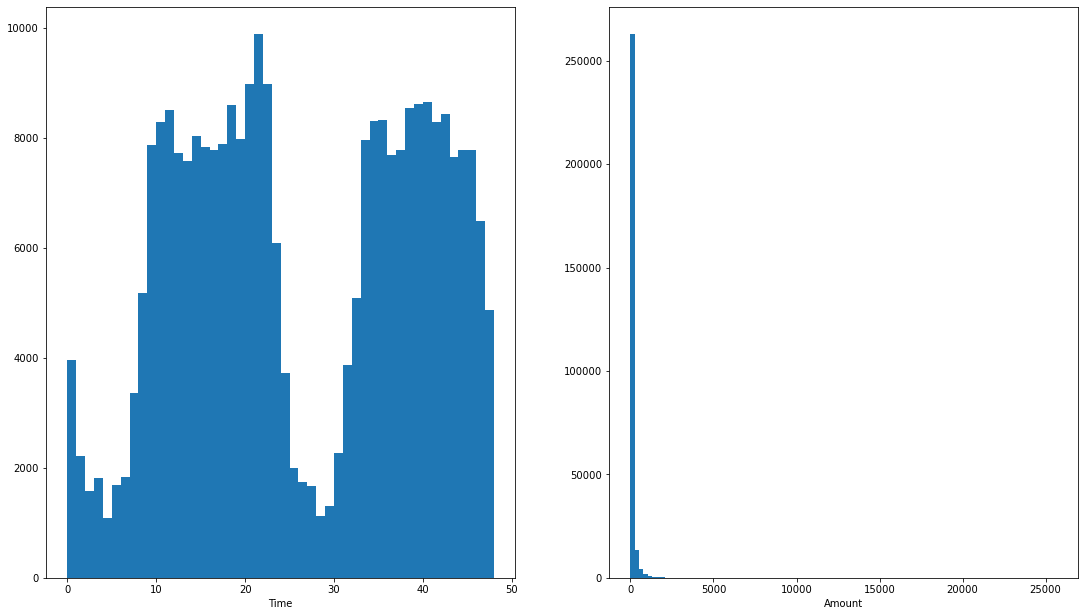

In [7]:
## Time Analysis 

fig, ax = plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)
ax[0].hist(df['Time']/(3600),bins=48)
ax[0].set_xlabel('Time')
ax[1].hist(df['Amount'],bins=100)
ax[1].set_xlabel('Amount')
plt.show()

 from this graph we can observe two peaks in data at 15th and 40th hour which indicate 
that daily modulation of traffic 

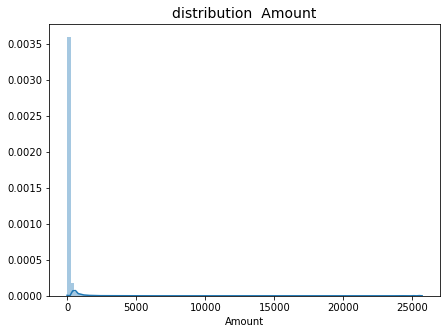

records with zero amount 1825
 minimum value is  0.01


In [8]:
## amount analysis

plt.figure(figsize=(7,5))
plt.title('distribution  Amount', fontsize=14)
sns.distplot(df['Amount'], bins=100)
plt.show()


Total_zero_records = len(df[df['Amount']==0])
minimum_non_zero =  df[df['Amount']>0]['Amount'].min()                       
                         
print ("records with zero amount {0}".format(Total_zero_records))                         
print (" minimum value is  {0}".format(minimum_non_zero))                         



* Most of the transaction is between 0 and 3000 
* we can see records with zero amount are 1825
* minimum value is 0.01

Here we will observe the distribution of our classes

In [9]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100


#labels
lab = df["Class"].value_counts().keys().tolist()
#values
val = df["Class"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

Text(0, 0.5, 'count')

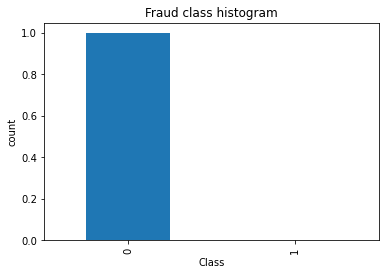

In [10]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
classes = pd.value_counts(df['Class'], sort = True,normalize=True).sort_index()
classes.plot(kind = 'bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("count")


## Amount analysis on classes 

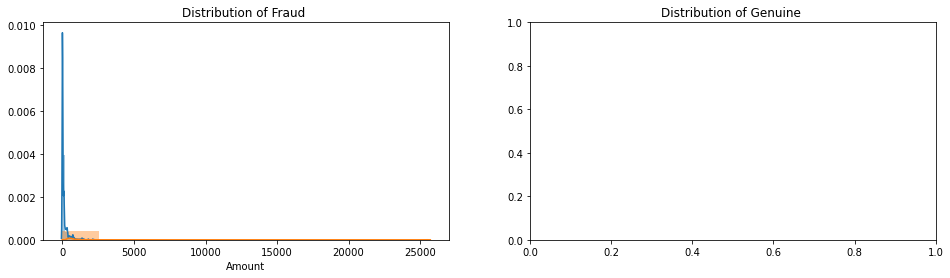

In [11]:
fig, axs = plt.subplots(ncols=2,figsize=(16,4))
sns.distplot(df[df['Class'] == 1]['Amount'], bins=10, ax=axs[0])
axs[0].set_title("Distribution of Fraud ")

sns.distplot(df[df['Class'] == 0]['Amount'], bins=10, ax=axs[0])
axs[1].set_title("Distribution of Genuine ")

plt.show()

* most of fraud transaction is less than 1000$  we can very high fraud near 0 amount transaction 

In [12]:
### checking at what amount most fraud transactions occur
print("Top 10 records for fraud transaction amount")
print(df[(df['Class'] == 1)]['Amount'].value_counts().head(10))
print('max fraud transaction amount ')
print(df[(df['Class'] == 1)]['Amount'].max())
print('minimum fraud transaction amount ')
print(df[(df['Class'] == 1)]['Amount'].min())


Top 10 records for fraud transaction amount
1.00     113
0.00     27 
99.99    27 
0.76     17 
0.77     10 
0.01     5  
2.00     4  
3.79     4  
1.10     3  
2.28     3  
Name: Amount, dtype: int64
max fraud transaction amount 
2125.87
minimum fraud transaction amount 
0.0


* we can see 0.00 transaction amount this is used for transaction verfication 

## Time analysis on classes 

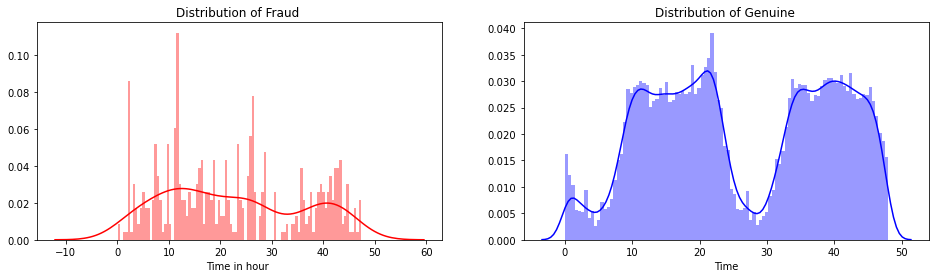

In [13]:
fig, axs = plt.subplots(ncols=2, figsize=(16,4))
sns.distplot(df[(df['Class'] == 1)]['Time']/3600, bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud ")
axs[0].set_xlabel('Time in hour')
sns.distplot(df[(df['Class'] == 0)]['Time']/3600, bins=100, color='blue', ax=axs[1])
axs[1].set_title("Distribution of Genuine ")
axs[0].set_xlabel('Time in hour ')

plt.show()


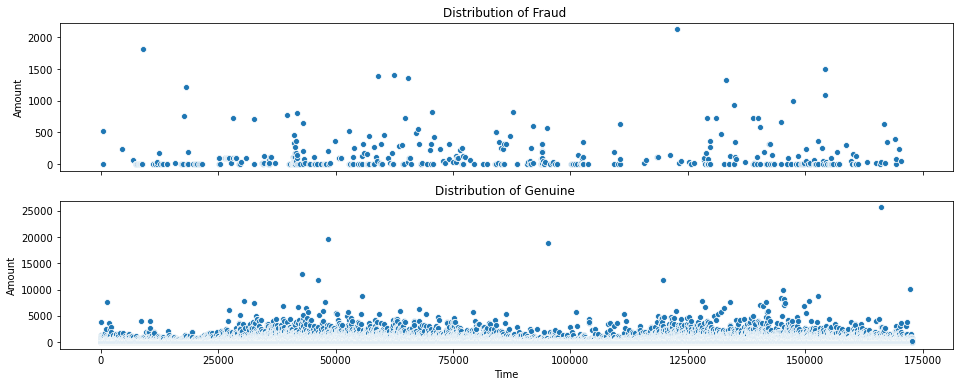

In [14]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud ")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Genuine ")

plt.show()

### Splitting the data into train & test data

In [15]:
### train test split 

X = df.drop(['Class'], axis=1)

y = df['Class']    

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)


In [16]:
scaler = StandardScaler()

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [23]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassfier": RandomForestClassifier(n_estimators=10),
    "XGBOOST" : XGBClassifier(n_estimators=10)
}
append_array = []
for key,classfir in classifiers.items():
    
    performcrossvalidation=True
    cv_folds = 5
    clf = classfir


    #Fit the algorithm on the data
    clf.fit(X_train_scale, y_train)

    #Predict training set:
    trainpredictions = clf.predict(X_train_scale)
    trainpredprob = clf.predict_proba(X_train_scale)[:,1]

    #Print model report:
    print ("****** {0} Model Report Train data ******* ".format(key))
#     print ("Accuracy : {0}".format(metrics.roc_auc_score(y_train, trainpredictions)))
#     print ("Recall/Sensitivity : {0}".format(metrics.recall_score(y_train, trainpredictions)))
#     print ("AUC Score ".format(metrics.roc_auc_score(y_train, trainpredprob)))

    if performcrossvalidation:
        cv_score = cross_val_score(clf, X_train_scale, y_train, cv=cv_folds, scoring='f1')    
    if performcrossvalidation:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))    


#     draw_roc(y_train, trainpredprob)    
    cut_off_prob = 0.5 
    y_train_df= pd.DataFrame({'fraud':y_train, 'fraud_Pb':trainpredprob})
    y_train_df['final_predicted'] = y_train_df.fraud_Pb.map( lambda x: 1 if x > cut_off_prob else 0)
    dic = getModelMetrics(y_train_df.fraud,y_train_df.final_predicted)
    dic['model_name']= key
    dic['cross_val_score_mean'] = np.mean(cv_score)
    append_array.append(dic)
  

metric = pd.DataFrame(append_array)
metric = metric[['model_name','Accuracy','Recall','precision',
       'f1_score','Roc_auc_score','cross_val_score_mean','Specificity',
       'False Positive Rate', 'Positive predictive value',
       'Negative Predictive value']]
metric

****** LogisiticRegression Model Report Train data ******* 
CV Score : Mean - 0.7676018 | Std - 0.02122044 | Min - 0.7394958 | Max - 0.8
[[198990     24]
 [   111    239]]
Roc_auc_score : 0.8413682741630525
Sensitivity/Recall : 0.6828571428571428
Specificity: 0.999879405468962
False Positive Rate: 0.00012059453103801742
Positive predictive value: 0.908745247148289
Negative Predictive value: 0.9994424940105775
sklearn precision score value: 0.908745247148289
Accuracy : 0.9993228466523545
Recall : 0.6828571428571428
Precision : 0.908745247148289
****** RandomForestClassfier Model Report Train data ******* 
CV Score : Mean - 0.850168 | Std - 0.02265659 | Min - 0.8153846 | Max - 0.8818898
[[199012      2]
 [    19    331]]
Roc_auc_score : 0.9728521180850163
Sensitivity/Recall : 0.9457142857142857
Specificity: 0.9999899504557468
False Positive Rate: 1.0049544253168119e-05
Positive predictive value: 0.993993993993994
Negative Predictive value: 0.9999045374841106
sklearn precision score value

,model_name,Accuracy,Recall,precision,f1_score,Roc_auc_score,cross_val_score_mean,Specificity,False Positive Rate,Positive predictive value,Negative Predictive value
0,LogisiticRegression,0.999323,0.682857,0.908745,0.779772,0.841368,0.767602,0.999879,0.000121,0.908745,0.999442
1,RandomForestClassfier,0.999895,0.945714,0.993994,0.969253,0.972852,0.850168,0.999990,0.000010,0.993994,0.999905
2,XGBOOST,0.999734,0.854286,0.993355,0.918587,0.927138,0.868522,0.999990,0.000010,0.993355,0.999744


In [24]:
## Apl
from sklearn.model_selection import GridSearchCV

def find_best_param(estimator,param_grid,X,Y):
    grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2,scoring='f1')
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_


log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

random_grid = {
    'bootstrap': [True],
    'max_depth': [80,100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 10],
    'n_estimators': [30,40,50]
}

xgboost = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "RandomForestClassfier": RandomForestClassifier(n_estimators=25),
    "XGBOOST" : XGBClassifier(n_estimators=25)
}

classifiers_grid = {
    "LogisiticRegression": log_reg_params,
    "RandomForestClassfier": random_grid,
    "XGBOOST" : xgboost  
    
}

best_param = {}
for key,classfir in classifiers.items():
    param=find_best_param(classfir,classifiers_grid[key],X_train_scale, y_train)
    best_param['best_param_{0}'.format(key)] = param
    

best_param    

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   21.2s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 17.4min finished


Fitting 3 folds for each of 405 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 45.3min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed: 58.9min finished


{'best_param_LogisiticRegression': LogisticRegression(C=1),
 'best_param_RandomForestClassfier': RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=50),
 'best_param_XGBOOST': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=5, missing=nan, monotone_constraints='()',
               n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='exact', validate_parameters=1, verbosity=None)}

****** LogisiticRegression Cutoff  Poient  ******* 


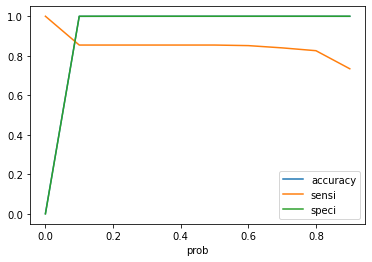

****** RandomForestClassfier Cutoff  Poient  ******* 


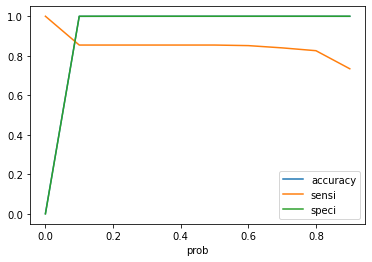

****** XGBOOST Cutoff  Poient  ******* 


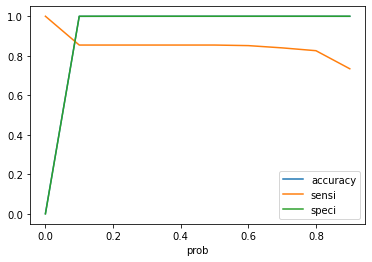

In [32]:
classifiers = {
    "LogisiticRegression": LogisticRegression(C=1),
    "RandomForestClassfier": RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=50),
    "XGBOOST" : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=5, monotone_constraints='()',
               n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='exact', validate_parameters=1, verbosity=None)
}
append_array = []
for key,classfir in classifiers.items():
    
#     performcrossvalidation=True
#     cv_folds = 5
#     clf = classfir
    print ("****** {0} Cutoff  Poient  ******* ".format(key))


    #Fit the algorithm on the data
    clf.fit(X_train_scale, y_train)

    #Predict training set:
    trainpredictions = clf.predict(X_train_scale)
    trainpredprob = clf.predict_proba(X_train_scale)[:,1]
    y_train_df= pd.DataFrame({'fraud':y_train, 'fraud_Pb':trainpredprob})
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        y_train_df[i]= y_train_df.fraud_Pb.map(lambda x: 1 if x > i else 0)
    cutoff_df = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    for i in num:
        cm1 = metrics.confusion_matrix(y_train_df.fraud, y_train_df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1

        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.show()        



In [ ]:
classifiers = {
    "LogisiticRegression": LogisticRegression(C=1),
    "RandomForestClassfier": RandomForestClassifier(max_depth=80, max_features=3, min_samples_leaf=3,
                        min_samples_split=10, n_estimators=50),
    "XGBOOST" : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.6, gamma=0.5, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=5,
               min_child_weight=5, monotone_constraints='()',
               n_estimators=25, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='exact', validate_parameters=1, verbosity=None)
}
train_append_array = []
test_append_array = []
for key,classfir in classifiers.items():
    
    performcrossvalidation=True
    cv_folds = 5
    clf = classfir


    #Fit the algorithm on the data
    clf.fit(X_train_scale, y_train)

    #Predict training set:
    trainpredictions = clf.predict(X_train_scale)
    trainpredprob = clf.predict_proba(X_train_scale)[:,1]

    #Print model report:
    print ("****** {0} Model Report Train data ******* ".format(key))
#     print ("Accuracy : {0}".format(metrics.roc_auc_score(y_train, trainpredictions)))
#     print ("Recall/Sensitivity : {0}".format(metrics.recall_score(y_train, trainpredictions)))
#     print ("AUC Score ".format(metrics.roc_auc_score(y_train, trainpredprob)))

    if performcrossvalidation:
        cv_score = cross_val_score(clf, X_train_scale, y_train, cv=cv_folds, scoring='f1')    
    if performcrossvalidation:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))    


#     draw_roc(y_train, trainpredprob)    
    cut_off_prob = 0.15
    y_train_df= pd.DataFrame({'fraud':y_train, 'fraud_Pb':trainpredprob})
    y_train_df['final_predicted'] = y_train_df.fraud_Pb.map( lambda x: 1 if x > cut_off_prob else 0)
    dic_train = getModelMetrics(y_train_df.fraud,y_train_df.final_predicted)
    dic_train['model_name']= key
    dic_train['cross_val_score_mean'] = np.mean(cv_score)
    train_append_array.append(dic_train)
    
    
    testpredictions = clf.predict(X_test)
    testpredprob = clf.predict_proba(X_test)[:,1]

    cut_off_prob = 0.15
    y_test_df= pd.DataFrame({'fraud':y_test, 'fraud_Pb':testpredprob})
    y_test_df['final_predicted'] = y_test_df.fraud_Pb.map( lambda x: 1 if x > cut_off_prob else 0)
    dic_test=getModelMetrics(y_test_df.fraud,y_test_df.final_predicted)
    dic_test['model_name']= key
    test_append_array.append(dic_test)
  

metric_train = pd.DataFrame(train_append_array)
metric_train = metric[['model_name','Accuracy','Recall','precision',
       'f1_score','Roc_auc_score','cross_val_score_mean','Specificity',
       'False Positive Rate', 'Positive predictive value',
       'Negative Predictive value']]
display(metric_train)



metric_test = pd.DataFrame(test_append_array)
metric_train = metric[['model_name','Accuracy','Recall','precision',
       'f1_score','Roc_auc_score','cross_val_score_mean','Specificity',
       'False Positive Rate', 'Positive predictive value',
       'Negative Predictive value']]
display(metric_train)

****** LogisiticRegression Model Report Train data ******* 
CV Score : Mean - 0.7676018 | Std - 0.02122044 | Min - 0.7394958 | Max - 0.8
[[198965     49]
 [    72    278]]
Roc_auc_score : 0.8970197502257558
Sensitivity/Recall : 0.7942857142857143
Specificity: 0.9997537861657974
False Positive Rate: 0.00024621383420261894
Positive predictive value: 0.8501529051987767
Negative Predictive value: 0.999638258213297
sklearn precision score value: 0.8501529051987767
Accuracy : 0.9993930699624807
Recall : 0.7942857142857143
Precision : 0.8501529051987767
[[85281    20]
 [  142     0]]
Roc_auc_score : 0.49988276808009285
Sensitivity/Recall : 0.0
Specificity: 0.9997655361601857
False Positive Rate: 0.00023446383981430463
Positive predictive value: 0.0
Negative Predictive value: 0.9983376842302425
sklearn precision score value: 0.0
Accuracy : 0.9981039991573329
Recall : 0.0
Precision : 0.0
****** RandomForestClassfier Model Report Train data ******* 


In [ ]:
trainpredictions = Decision_final.predict(X_train_pca)
trainpredprob = Decision_final.predict_proba(X_train_pca)[:,1]

cut_off_prob = 0.55
y_train_df= pd.DataFrame({'churn':y_train_res, 'churn_Pb':trainpredprob})
y_train_df['final_predicted'] = y_train_df.churn_Pb.map( lambda x: 1 if x > cut_off_prob else 0)
getModelMetrics(y_train_df.churn,y_train_df.final_predicted)


